In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('playstore.csv')
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3657,HTC Weather,WEATHER,3.9,22154,21516.529524,"10,000,000+",Free,0,Everyone,Weather,"August 10, 2017",8.50.935520,4.4 and up
8216,DB LINK RGB,TOOLS,2.7,7,5200.000000,500+,Free,0,Everyone,Tools,"June 19, 2017",1.0.2,4.4 and up
9663,EO Hub,BUSINESS,NaN,0,5200.000000,50+,Free,0,Teen,Business,"February 6, 2018",3.5.4,4.1 and up
5314,University of Alabama,FAMILY,4.5,302,3000.000000,"50,000+",Free,0,Everyone,Education,"November 30, 2017",3.3,4.1 and up
8716,DQ Events,BUSINESS,2.3,41,20000.000000,"10,000+",Free,0,Everyone,Business,"December 20, 2017",1.1,4.0 and up


In [4]:
data.shape

(10841, 13)

In [5]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [6]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data clean up – Missing value treatment

### Drop records where rating is missing since rating is our target/study variable

In [7]:
data.dropna(subset=['Rating'],axis='rows', inplace = True)

In [8]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### Check the null values for the Android Ver column

In [9]:
pd.isnull(data['Android Ver']).sum()

3

#### Are all 3 records having the same problem?

In [10]:
data[data['Android Ver'].isnull()] # Displaying rows with NaN values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


__Values at Index-10472 seems to be Erratic as compared to other 2 columns__

#### Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
i = data[((data.App == 'Life Made WI-Fi Touchscreen Photo Frame') & (data['Android Ver'].isnull()))].index
print(i)
data.drop(i,inplace = True)

Int64Index([10472], dtype='int64')


In [12]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


_# Record with index no. 10472 is deleted_

#### Replace remaining missing values with the mode

In [13]:
data['Android Ver'].mode() # Mode of 'Android Ver' column

0    4.1 and up
dtype: object

In [14]:
data['Android Ver'] = data.fillna({'Android Ver':data['Android Ver'].mode()})

In [15]:
data[data['Android Ver'].isnull()] ## Recheck for Null values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Current ver – replace with most common value

In [16]:
pd.isnull(data['Current Ver']).sum()

4

In [17]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,Learn To Draw Kawaii Characters
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,Market Update Helper
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,Virtual DJ Sound Mixer
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,Dots puzzle


In [18]:
data['Current Ver'] = data.fillna({'Current Ver':data['Current Ver'].mode()})

In [19]:
data.isna().sum() # Reconfirming all for zero Null values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
data.shape

(9366, 13)

## Data clean up – Correcting the data types

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### Which all variables need to be brought to numeric types?

__--- Variables such as Reviews, Installs, Price,__

### Price variable – remove '$' sign and convert to float

In [22]:
data['Price'].sample(5) ## Values in Price col with $ sign

8449    $2.99
9219        0
8090        0
780         0
8670        0
Name: Price, dtype: object

In [23]:
data['Price'] = data.Price.apply(lambda x: x.replace('$','')).astype(float)

# Alternate code : data['Price'] = data['Price'].str.replace('$','').astype(dtype='float')

In [24]:
data['Price'].sample(5) ## Values in Price col without $ sign

# Alternate code : data.sample(n=5, weights='Price') 

5755    0.0
4320    0.0
8056    0.0
3819    0.0
7044    0.0
Name: Price, dtype: float64

### Installs – Remove ‘,’ and ‘+’ sign, convert to integer

In [25]:
data['Installs'].sample(5)

4355     50,000,000+
10587         5,000+
1127        500,000+
8039         10,000+
593         100,000+
Name: Installs, dtype: object

In [26]:
data['Installs'] = data.Installs.apply(lambda x: x.replace(',',''))
data['Installs'] = data.Installs.apply(lambda x: x.replace('+',''))

In [27]:
data['Installs'] = data.Installs.apply(lambda x: x.strip()).astype(int)

In [28]:
data['Installs'].sample(5)

4190         5000
10719        1000
9044        10000
4795     10000000
6037       100000
Name: Installs, dtype: int32

### Convert all other identified columns to num

In [29]:
data['Rating'] = data[['Rating']].astype(float)
data['Reviews'] = data[['Reviews']].astype(int)
data['Size'] = data[['Size']].astype(int)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null int32
Size              9366 non-null int32
Installs          9366 non-null int32
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), int32(3), object(8)
memory usage: 914.6+ KB


## Sanity checks – check for the following and handle accordingly

### Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### Are there any such records? Drop if so.

In [31]:
(data['Rating']>5).sum()

0

### Reviews should not be more than installs as only those who installed can review the app.

#### Are there any such records? Drop if so.

In [32]:
(data['Reviews'] > data['Installs']).sum()

7

In [33]:
data.drop(data[data['Reviews'] > data['Installs']].index, axis=0, inplace=True)

In [34]:
(data['Reviews'] > data['Installs']).sum()

0

## Identify and handle outliers

### Price column

#### Make suitable plot to identify outliers in Price 

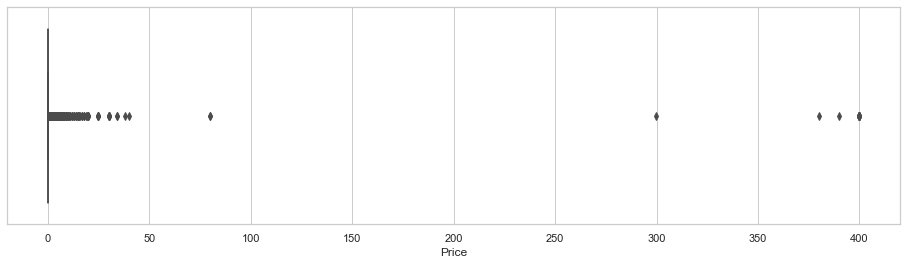

In [35]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
sns.boxplot(x='Price',data=data,palette='Set1');

___It can be seen from the plot that Price values lie between 0 to 50 except few outliers.___

#### Do you expect apps on the play store to cost $200? Check out these cases

In [36]:
(data['Price']>200).sum()

15

In [37]:
data.drop(data[data['Price']>200].index, axis=0, inplace=True)

In [38]:
(data['Price']>200).sum()

0

#### After dropping the useless records, make the suitable plot again to identify outliers

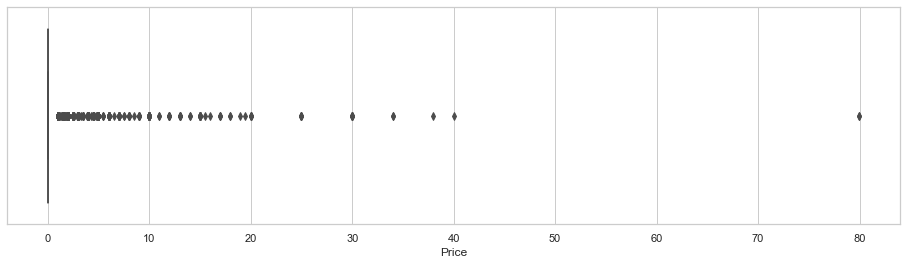

In [39]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
sns.boxplot(x='Price',data=data,palette='Set1');

#### Limit data to records with price < $30

In [40]:
(data['Price']>=30).sum()

6

In [41]:
data.drop(data[data['Price']>=30].index, axis=0, inplace=True)

In [42]:
(data['Price']>=30).sum()

0

### Reviews column

#### Make suitable plot

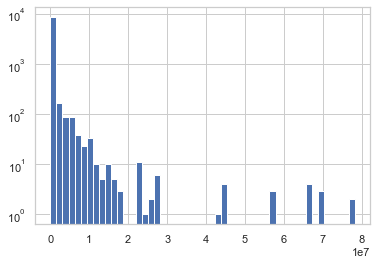

In [43]:
plt.hist(x='Reviews',bins=50,color='b',data=data,alpha = 1,log=True);

#### Limit data to apps with < 1 Million reviews

In [44]:
(data['Reviews']>=1000000).sum()

704

In [45]:
data.drop(data[data['Reviews']>1000000].index, axis=0, inplace=True)

In [46]:
(data['Reviews']>=1000000).sum()

0

### Installs

#### What is the 95th percentile of the installs?

In [47]:
quant = data['Installs'].quantile(0.95)
quant 

10000000.0

#### Drop records having a value more than the 95th percentile

In [48]:
(data['Installs']>quant).sum()

199

In [49]:
data.drop(data[data['Installs']>quant].index, axis=0, inplace=True)

In [50]:
(data['Installs']>quant).sum()

0

__Data analysis to answer business questions:__
## What is the distribution of ratings like? (Use Seaborn) More skewed towards higher/lower values?

### How do you explain this?

Skewness: -1.743427
Kurtosis: 5.153913


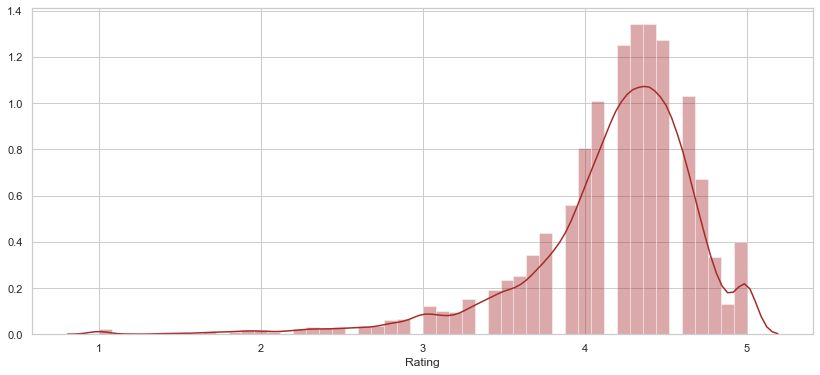

In [51]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.distplot(data['Rating'] , color="brown")
print("Skewness: %f" % data['Rating'].skew())
print("Kurtosis: %f" % data['Rating'].kurt())

### What is the implication of this on your analysis?

It's clearly seen from the plot that the distribution of __'Ratings'__ displays __'Negative Skewness' and 'Leptokurtic Kurtosis'.__

__Negative Skewness depicts 'Ratings' data is highly skewed towards higher values i.e between 4 to 5 and Leptokurtic Kurtosis tells us that data contains outliers in large number.__

## What are the top Content Rating values?

### Are there any values with very few records?

In [52]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


It can be seen from above that 'Adults only 18+' & 'Unrated' indices have very few records, 3 & 1 respectively.

### If yes, drop those as they won’t help in the analysis

In [53]:
data.drop(data[(data["Content Rating"]=='Adults only 18+')].index,axis=0,inplace=True)
data.drop(data[(data["Content Rating"]=='Unrated')].index,axis=0,inplace=True)

In [54]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900


'Adults only 18+' & 'Unrated' have been dropped.

## Effect of size on rating

### Make a joinplot to understand the effect of size on rating

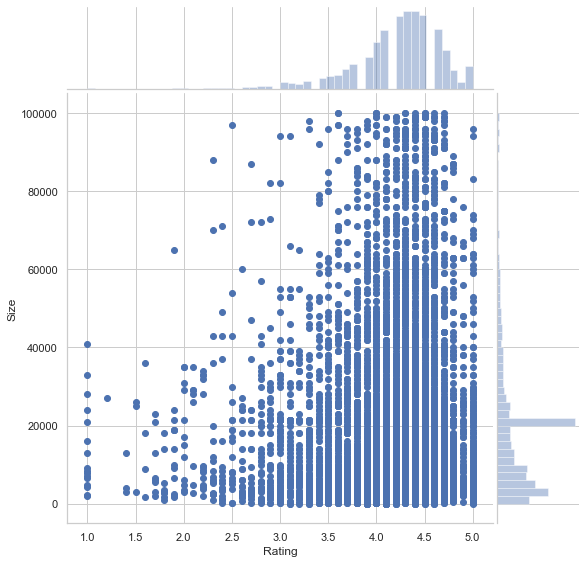

In [55]:
sns.set(style="whitegrid",color_codes=True);
sns.jointplot(x='Rating',y='Size',data=data , color="b",height=8, space=0.05);

### Do you see any patterns?

There isn't any corelation between the Size and Rating. Data is densely populated between 4 to 5 Ratings and 0 to 20000 Size.

### How do you explain the pattern?

Apps with size upto 20000 are rated on an average of 4.5. Also we can see a spike around Size value 21000 which indicate there are large number of apps with this size.

## Effect of Price on Rating

### Make a jointplot (with regression line)

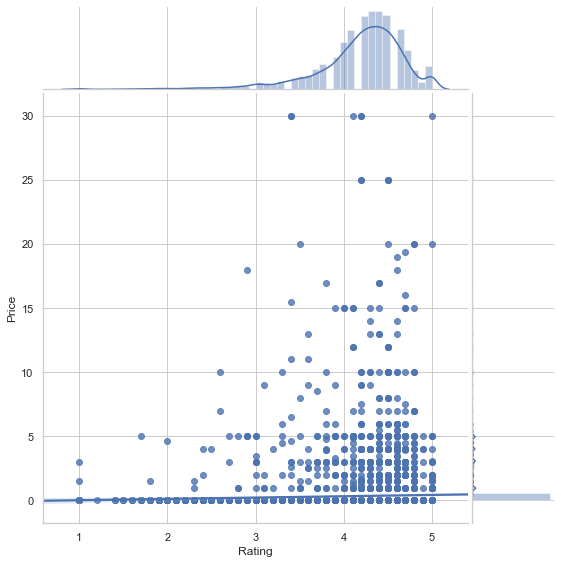

In [58]:
sns.set(style="whitegrid",color_codes=True);
sns.jointplot(x='Rating',y='Price',data=data,color="b",height=8, kind='reg',space=0.05);

### What pattern do you see?

There isn't any corelation between Price and Ratings.


### How do you explain the pattern?

Maximum data points are concentrated around Price value 0 (zero) for all Rating categories.


### Replot the data, this time with only records with price > 0

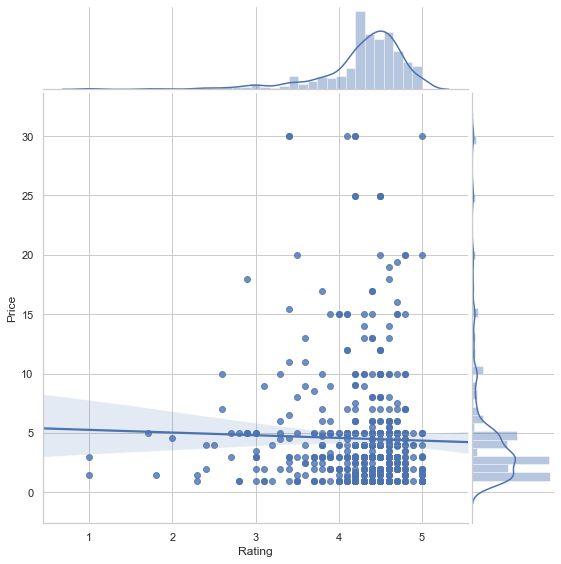

In [405]:
price_grt_zero = data[(data['Price']>0)]
sns.jointplot(x='Rating',y='Price',data=price_grt_zero , color="b",height=8, kind= 'reg' ,space=0.05);

### Does the pattern change?

There is no significant change in the pattern, but a slight negative corelation is observed.

### What is your overall inference on the effect of price on the rating

There isn't any direct effect of Price on the Rating.

## Look at all the numeric interactions together –

### Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

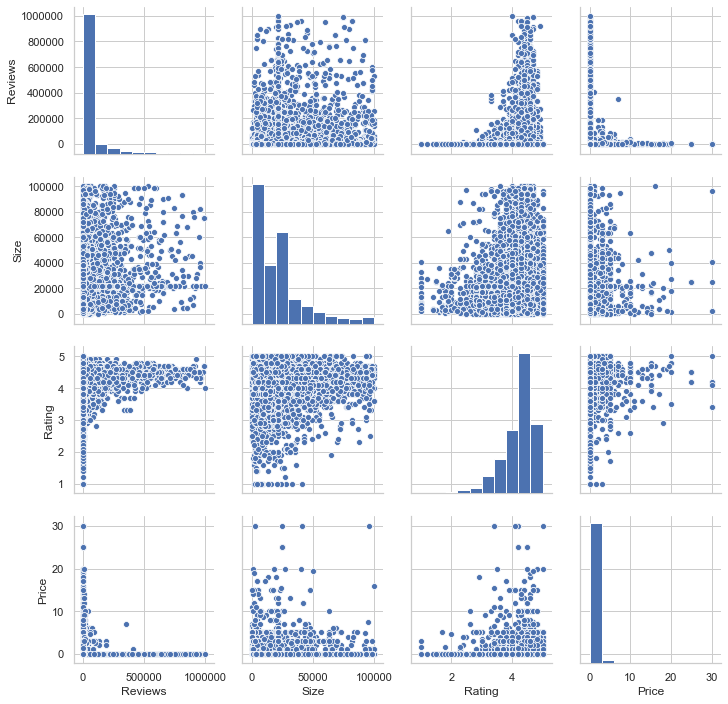

In [406]:
sns.pairplot(data,vars=['Reviews', 'Size', 'Rating', 'Price'],palette="husl");

## Rating vs. content rating

###  Make a bar plot displaying the rating for each content rating

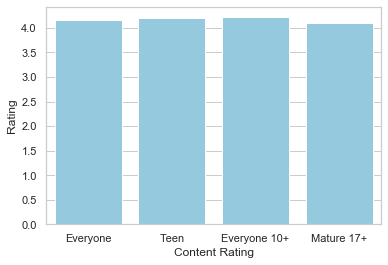

In [407]:
sns.barplot(x='Content Rating',y='Rating',data=data, ci=None, color='skyblue');

### Which metric would you use? Mean? Median? Some other quantile?

### Choose the right metric and plot
_Plotting barplot with __'MIN'__ metric to know the minimum rating for each Content Rating Category_

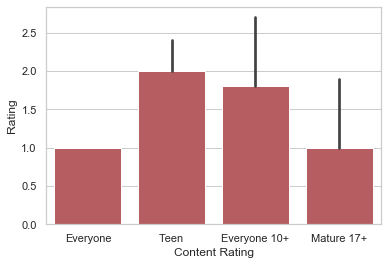

In [408]:
# from numpy import median
sns.barplot(x='Content Rating',y='Rating',data=data,estimator=min,color='r');

## Content rating vs. size vs. rating – 3 variables at a time

### Create 5 buckets (20% records in each) based on Size

In [409]:
data['size_bucket'] = pd.qcut(data['Size'], q=5)

In [410]:
data['size_bucket'].value_counts()

(12000.0, 21516.0]     2310
(4600.0, 12000.0]      1789
(7.999, 4600.0]        1713
(32000.0, 100000.0]    1682
(21516.0, 32000.0]      937
Name: size_bucket, dtype: int64

In [411]:
data['size_bucket'] = pd.qcut(data['Size'], q=5,labels=['One','Two','Three','Four','Five'])

### By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

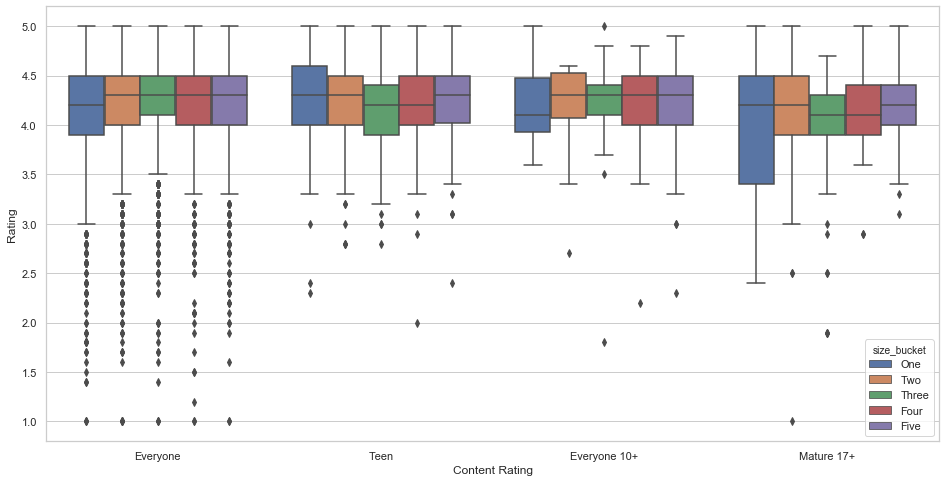

In [412]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Content Rating',y='Rating',hue='size_bucket',data=data);

### Make a heatmap of this
__i. Annotated  ii. Greens color map__

In [413]:
pivot = data.pivot_table(columns='Content Rating',index='size_bucket',values='Rating')

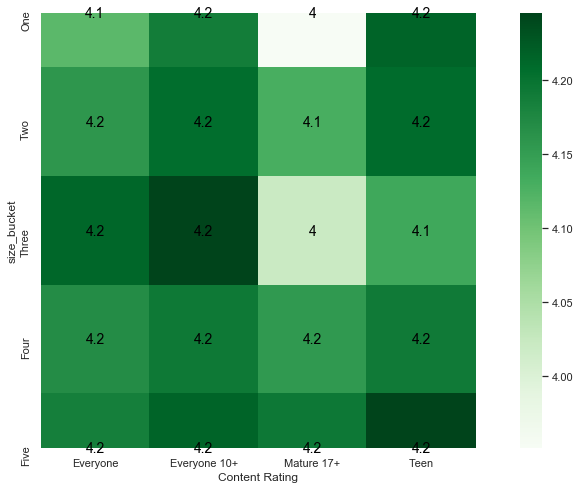

In [414]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(pivot, annot=True, cmap='Greens',annot_kws={"color":'black',"size":14},square=True)

### What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Lighter apps are preferred in almost all categories and Heavier are more preferred in Teen category